# Validação da Ferramenta - Caso Smith Wing

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sys
import os
import pickle

from context import src
from src import aerodynamics as aero
from src import aeroelasticity as aelast
from src import control
from src import flight_mechanics as flmec
from src import geometry as geo
from src import loads
from src import structures as struct
from src import visualization as vis

from smith_wing_data import smith_wing

In [85]:
f = open("results\\results2.pckl", "rb")
results_case0, results_case1, results_case2, iteration_results_case2, results_case3, iteration_results_case3 = pickle.load(
    f
)
f.close()

## Alpha = 2º, Airspeed = 25m/s, Altitude = 20000 m

In [87]:
bending_data = np.genfromtxt("data\\smith_wing_fig7_bending.csv", delimiter=";", skip_header=3)
twist_data = np.genfromtxt("data\\smith_wing_fig7_torsion.csv", delimiter=";", skip_header=3)
lift_data = np.genfromtxt("data\\smith_wing_fig7_lift.csv", delimiter=";", skip_header=3)

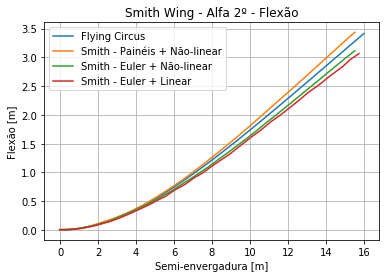

In [91]:
deformation_table = aelast.functions.calculate_deformation_table(
    results_case2["aircraft_original_grids"],
    results_case2["aircraft_struct_deformations"],
)

# sort nodes by desired column, in this case the Y coordinate

nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], nodes[middle:, 2], label="Flying Circus")
ax.plot(bending_data[:, 0], bending_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(bending_data[:, 2], bending_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(bending_data[:, 4], bending_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.set_title("Smith Wing - Alfa 2º - Flexão")
ax.set_ylabel("Flexão [m]")
ax.set_xlabel("Semi-envergadura [m]")
ax.legend()
fig.savefig("results\\smith_comp_bend_2.png", dpi=300)

alpha2_y = nodes[:,1]
alpha2_bending = nodes[:,2]

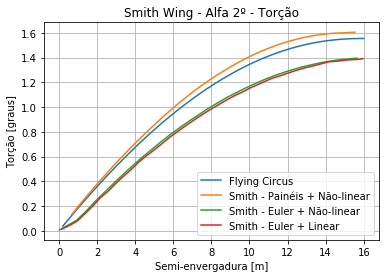

In [90]:
nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], np.degrees(nodes[middle:, 4]), label="Flying Circus")
ax.plot(twist_data[:, 0], twist_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(twist_data[:, 2], twist_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(twist_data[:, 4], twist_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.set_title("Smith Wing - Alfa 2º - Torção")
ax.set_ylabel("Torção [graus]")
ax.set_xlabel("Semi-envergadura [m]")
ax.legend()

fig.savefig("results\\smith_comp_twist_2.png", dpi=300)

alpha2_torsion = np.degrees(nodes[:,4])

In [60]:
components_loads = loads.functions.calc_load_distribution(
    aircraft_force_grid=results_case2["aircraft_force_grid"],
    aircraft_gamma_grid=results_case2["aircraft_gamma_grid"],
    aircraft_panel_grid=results_case2["original_aircraft_panel_grid"],
    attitude_vector=np.array([2, 0, 0]),
    altitude=20000,
    speed=25,
)
component = components_loads[0]
middle = int(len(component["y_values"]) / 2)

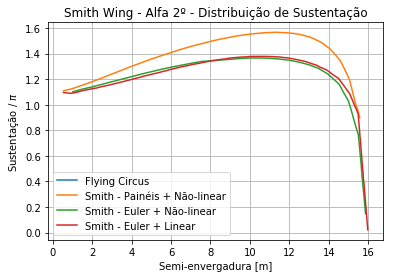

In [92]:
fig, ax = plt.subplots()
ax.set_title("Smith Wing - Alfa 2º - Distribuição de Sustentação")
ax.set_xlabel("Semi-envergadura [m]")
ax.set_ylabel("Sustentação / $\pi$")
ax.plot(component["y_values"][middle:], component["lift"][middle:] / (2*np.pi), label="Flying Circus")
ax.plot(lift_data[:, 0], lift_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(lift_data[:, 2], lift_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(lift_data[:, 4], lift_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.legend()

fig.savefig("results\\case002_lift.png", dpi=300)

## Alpha = 4º, Airspeed = 25m/s, Altitude = 20000 m

In [93]:
bending_data = np.genfromtxt("data\\smith_wing_fig8_bending.csv", delimiter=";", skip_header=3)
twist_data = np.genfromtxt("data\\smith_wing_fig8_torsion.csv", delimiter=";", skip_header=3)
lift_data = np.genfromtxt("data\\smith_wing_fig8_lift.csv", delimiter=";", skip_header=3)

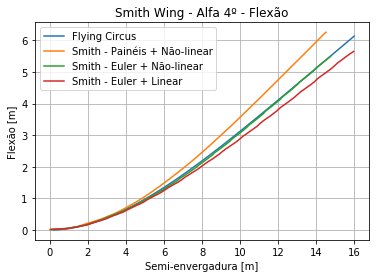

In [95]:
deformation_table = aelast.functions.calculate_deformation_table(
    results_case3["aircraft_original_grids"],
    results_case3["aircraft_struct_deformations"],
)

# sort nodes by desired column, in this case the Y coordinate

nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], nodes[middle:, 2], label="Flying Circus")
ax.plot(bending_data[:, 0], bending_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(bending_data[:, 2], bending_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(bending_data[:, 4], bending_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.set_title("Smith Wing - Alfa 4º - Flexão")
ax.set_ylabel("Flexão [m]")
ax.set_xlabel("Semi-envergadura [m]")
ax.legend()
fig.savefig("results\\smith_comp_bend_4.png", dpi=300)

alpha4_y = nodes[:,1]
alpha4_bending = nodes[:,2]

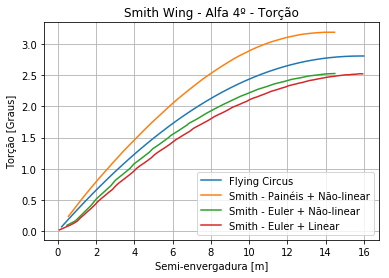

In [97]:
nodes = deformation_table["aircraft_macrosurfaces_deformed_nodes"][0]
nodes = nodes[nodes[:, 1].argsort()]
middle = int(len(nodes) / 2) + 1
# Plot Bending
fig, ax = plt.subplots()
ax.plot(nodes[middle:, 1], np.degrees(nodes[middle:, 4]), label="Flying Circus")
ax.plot(twist_data[:, 0], twist_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(twist_data[:, 2], twist_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(twist_data[:, 4], twist_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.set_title("Smith Wing - Alfa 4º - Torção")
ax.set_ylabel("Torção [Graus]")
ax.set_xlabel("Semi-envergadura [m]")
ax.legend()

fig.savefig("results\\smith_comp_twist_4.png", dpi=300)

alpha4_torsion = np.degrees(nodes[:,4])

In [98]:
components_loads = loads.functions.calc_load_distribution(
    aircraft_force_grid=results_case3["aircraft_force_grid"],
    aircraft_gamma_grid=results_case3["aircraft_gamma_grid"],
    aircraft_panel_grid=results_case3["original_aircraft_panel_grid"],
    attitude_vector=np.array([4, 0, 0]),
    altitude=20000,
    speed=25,
)
component = components_loads[0]
middle = int(len(component["y_values"]) / 2)

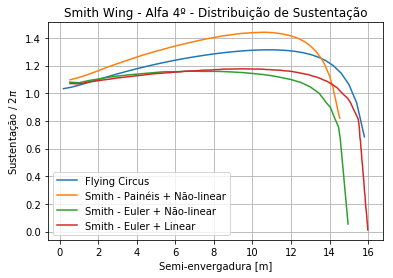

In [99]:
fig, ax = plt.subplots()
ax.set_title("Smith Wing - Alfa 4º - Distribuição de Sustentação")
ax.set_xlabel("Semi-envergadura [m]")
ax.set_ylabel("Sustentação / $2\pi$")
ax.plot(component["y_values"][middle:], component["lift"][middle:] / (4*np.pi), label="Flying Circus")
ax.plot(lift_data[:, 0], lift_data[:, 1], label="Smith - Painéis + Não-linear")
ax.plot(lift_data[:, 2], lift_data[:, 3], label="Smith - Euler + Não-linear")
ax.plot(lift_data[:, 4], lift_data[:, 5], label="Smith - Euler + Linear")
ax.grid()
ax.legend()

fig.savefig("results\\case003_lift.png", dpi=300)

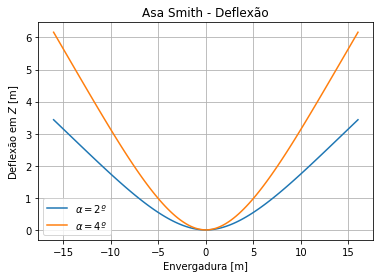

In [81]:
fig, ax = plt.subplots()
ax.set_title("Asa Smith - Deflexão")
ax.set_xlabel("Envergadura [m]")
ax.set_ylabel("Deflexão em $Z$ [m]")
ax.plot(alpha2_y, alpha2_bending, label="$\\alpha = 2º$")
ax.plot(alpha4_y, alpha4_bending, label="$\\alpha = 4º$")

ax.grid()
ax.legend()

fig.savefig("results\\bending_smith.png", dpi=300)

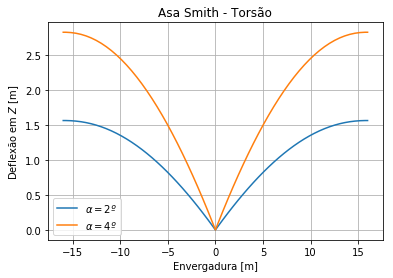

In [83]:
fig, ax = plt.subplots()
ax.set_title("Asa Smith - Torsão")
ax.set_xlabel("Envergadura [m]")
ax.set_ylabel("Deflexão em $Z$ [m]")
ax.plot(alpha2_y, alpha2_torsion, label="$\\alpha = 2º$")
ax.plot(alpha4_y, alpha4_torsion, label="$\\alpha = 4º$")

ax.grid()
ax.legend()

fig.savefig("results\\torsion_smith.png", dpi=300)

In [84]:
f = open("mesh_sensitivity.pckl", "rb")
results_list, iteration_results_list =  pickle.load(f)
f.close()

In [ ]:
Cls = []
Cds = []
Cms = []
lift_distributions = []
cl_distributions = []
tip_node_deformations = []
ys = []
for result in results_list:
    
    V_X = 25
    V_Y = 0
    V_Z = 0

    # Rotation velocities
    R_X = 0
    R_Y = 0
    R_Z = 0

    # Aircraft Attitude in relation to the wind axis, in degrees
    ALPHA = 2  # Pitch angle
    BETA = 0  # Yaw angle
    GAMMA = 0  # Roll angle

    # Center of rotation, usually the aircraft CG position
    CENTER_OF_ROTATION = smith_wing.inertial_properties.position

    # Flight altitude, used to calculate atmosppheric conditions, in meters
    ALTITUDE = 20000

    forces, moments, coefficients = loads.functions.calc_lift_drag(
        aircraft=smith_wing,
        point=CENTER_OF_ROTATION,
        speed=V_X,
        altitude=ALTITUDE,
        attitude_vector=np.array([ALPHA, BETA, GAMMA]),
        aircraft_force_grid=result["aircraft_force_grid"],
        aircraft_panel_grid=result["aircraft_deformed_macrosurfaces_aero_panels"],
    )
    
    Cls.append(coefficients['Cl'])
    Cds.append(coefficients['Cd'])
    Cms.append(coefficients['Cm'])

    #print()
    #print("# Aerodynamic Coeffients:")
    #print(f"    - Lift: {forces['lift']} N")
    #print(f"    - Cl: {coefficients['Cl']}")
    #print(f"    - Drag: {forces['drag']} N")
    #print(f"    - Cd: {coefficients['Cd']}")
    #print(f"    - Pitch Moment: {moments['pitch_moment']} N.m")
    #print(f"    - Cm: {coefficients['Cm']}")

    # Create load distribution plots
    components_loads = loads.functions.calc_load_distribution(
        aircraft_force_grid=result["aircraft_force_grid"],
        aircraft_panel_grid=result["original_aircraft_panel_grid"],
        aircraft_gamma_grid=result["aircraft_gamma_grid"],
        attitude_vector=np.array([ALPHA, BETA, GAMMA]),
        altitude=ALTITUDE,
        speed=V_X,
    )
    
    lift_distributions.append(components_loads[0]["lift"])
    cl_distributions.append(components_loads[0]["Cl"])
    ys.append(components_loads[0]["y_values"])
    tip_node_deformations.append(result["deformation_at_control_node"])
    
    #for component in components_loads:
#        fig = plt.figure()
#        ax1 = fig.add_subplot(3, 1, 1)
#        ax1.set_title("Smith Wing - Case 001 - Lift Distribution")
#        ax1.set_xlabel("Spam Position [m]")
#        ax1.set_ylabel("Lift [N]")
#        ax1.plot(component["y_values"], component["lift"])
#        ax1.grid()
#    
#        ax2 = fig.add_subplot(3, 1, 2)
#        ax2.set_title("Smith Wing - Case 001 -Cl Distribution")
#        ax2.set_xlabel("Spam Position [m]")
#        ax2.set_ylabel("Cl")
#        ax2.plot(component["y_values"], component["Cl"])
#        ax2.grid()#
#
#        ax3 = fig.add_subplot(3, 1, 3)
#        ax3.set_title("Smith Wing - Case 001 - Drag Distribution")
#        ax3.set_xlabel("Spam Position [m]")
#        ax3.set_ylabel("Drag [N]")
#        ax3.plot(component["y_values"], component["drag"])
#        ax3.grid()
#        plt.tight_layout()

Cls = np.array(Cls)
Cds = np.array(Cds)
Cms = np.array(Cms)
cl_distributions = np.array(cl_distributions)
tip_node_deformations = np.array(tip_node_deformations)
ys = np.array(ys)
lift_distributions = np.array(lift_distributions)

In [ ]:
n_panels = []
for i in range(1,len(results_list)+1):
    
    N_CHORD_PANELS = i
    N_SPAN_PANELS = int(16 / (2 * (1 / i)))
    n_panels.append(2*N_CHORD_PANELS*N_SPAN_PANELS)

plt.plot(range(1,len(results_list)+1), n_panels)


In [ ]:
int(16 / (2 * (1 / 5)))

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Evolução da Deformação com o Número de Painéis")
ax.set_xlabel("Número de Painéis Aerodinâmicos")
ax.set_ylabel("Deflexão em Z da ponta da asa [m]")
lns1 = ax.plot(n_panels,tip_node_deformations[:,2],  label="Flexão", c="darkblue")

ax2 = ax.twinx()
ax2.set_ylabel("Torção em Y da ponta da asa [Graus]")
lns2 = ax2.plot(n_panels,np.degrees(tip_node_deformations[:,4]),  label="Torção", c="firebrick")

#ax.plot(lift_data[:, 0], lift_data[:, 1], label="Smith - Panel + Nonlinear")
#ax.plot(lift_data[:, 2], lift_data[:, 3], label="Smith - Euler + Nonlinear")
#ax.plot(lift_data[:, 4], lift_data[:, 5], label="Smith - Euler + linear")


lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs)
plt.tight_layout()
fig.savefig("results\\evolucao_def", dpi=300)

In [ ]:
100 * abs(tip_node_deformations[:,4][-1] - tip_node_deformations[:,4][4]) / tip_node_deformations[:,4][4]

In [ ]:
100 * abs(tip_node_deformations[:,2][-1] - tip_node_deformations[:,2][4]) / tip_node_deformations[:,2][4]

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Evolução do $C_l$ com o Número de Painéis")
ax.set_xlabel("Número de Painéis Aerodinâmicos")
ax.set_ylabel("$C_l$")
ax.plot(n_panels, Cls)
ax.grid()
plt.tight_layout()
fig.savefig("results\\evolucao_cl", dpi=300)

In [ ]:
n_panels, Cls

In [ ]:
100 * abs(Cls[-1]-Cls[4])/Cls[4]

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Evolução do Tempo de Simulação com o Número de Painéis")
ax.set_xlabel("Número de Painéis Aerodinâmicos")
ax.set_ylabel("Tempo de Simulação [s]")
times = [22, 56, 2*60+34, 5*60+41, 10*60+34, 17*60+37, 27*60+21, 39*60+16, 57*60+6, 70*60]
ax.plot(n_panels,times)
ax.grid()
plt.tight_layout()
fig.savefig("results\\evolucao_time", dpi=300)

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Evolução da Distribuição de Sustentação com o Número de Painéis")
ax.set_xlabel("Número de Painéis Aerodinâmicos")
ax.set_ylabel("$C_l$")

i = 0
for dist, y in zip(lift_distributions, ys):
    ax.plot(y, dist, label=f"{n_panels[i]} painéis")
    i +=1

ax.legend(loc=1)
ax.grid()
plt.tight_layout()
fig.savefig("results\\evolucao_cls_dist", dpi=300)